This notebook briefly explores the dataset, both from the visual and textual point of view. Since the original dataset contains an high number of genres (which ultimately are going to be our labels), some of them being rather similer to each other, I manually merged most of them into high-level clusters. As a consequence, I have obtained 35 different genres from the 110 original ones. 

In [ ]:
%%capture
!unzip /content/drive/MyDrive/Colab_Notebooks/podcast/appledataset/images.zip -d  /content/images

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/Colab_Notebooks/podcast/appledataset/all_podcast_withpaths.csv')

In [3]:
df.drop(['Unnamed: 0', 'Episode Count', 'Episode Durations', 'iTunes URL', 'Feed URL', 'Podcast URL', 'authors'], axis= 1, inplace=True) #drop some useless columns

In [4]:
df

,Name,Artwork,Genre IDs,Primary Genre,Description,filepaths
0,Firearms Radio Network (All Shows),https://is1-ssl.mzstatic.com/image/thumb/Podca...,"['Wilderness', 'Podcasts', 'Sports', 'Leisure'...",Wilderness,Master Feed,/content/drive/MyDrive/Colab_Notebooks/podcast...
1,Clear and Present Danger - A history of free s...,https://is4-ssl.mzstatic.com/image/thumb/Podca...,"['History', 'Podcasts', 'Society & Culture']",History,"Why have kings, emperors, and governments kill...",/content/drive/MyDrive/Colab_Notebooks/podcast...
2,2 Idiots and a List,https://is4-ssl.mzstatic.com/image/thumb/Podca...,"['Music Commentary', 'Podcasts', 'Music']",Music Commentary,"Welcome to “2 Idiots and a List”, the podcast ...",/content/drive/MyDrive/Colab_Notebooks/podcast...
3,Forever35,https://is5-ssl.mzstatic.com/image/thumb/Podca...,"['Fashion & Beauty', 'Podcasts', 'Arts', 'Heal...",Fashion & Beauty,Which night creams will make you look well-res...,/content/drive/MyDrive/Colab_Notebooks/podcast...
4,DarbyCast,https://is2-ssl.mzstatic.com/image/thumb/Podca...,"['Comedy Fiction', 'Podcasts', 'Fiction']",Comedy Fiction,"Neither the Darbyshire book series, nor this p...",/content/drive/MyDrive/Colab_Notebooks/podcast...
...,...,...,...,...,...,...
29274,Within the Trenches,https://is5-ssl.mzstatic.com/image/thumb/Podca...,"['1304', '26']",Education,The JCast on Jabber Log features two main show...,/content/drive/MyDrive/Colab_Notebooks/podcast...
29275,"MTG Pro Tutor - Insights, Tips & Advice from M...",https://is1-ssl.mzstatic.com/image/thumb/Podca...,"['1461', '26', '1323', '1460']",Games,MTG Pro Tutor is a top rated Magic: The Gather...,/content/drive/MyDrive/Colab_Notebooks/podcast...
29276,National CASA Podcast,https://is4-ssl.mzstatic.com/image/thumb/Featu...,"['1475', '26', '1325', '1304', '1468']",Government,"Today, more than 1,000 CASA program offices op...",/content/drive/MyDrive/Colab_Notebooks/podcast...
29277,Tottenham Hotspur Family,https://is4-ssl.mzstatic.com/image/thumb/Podca...,"['1467', '26', '1316']",Sports,The Tottenham Hotspur Family Podcast\n\n\nA gl...,/content/drive/MyDrive/Colab_Notebooks/podcast...


Some examples

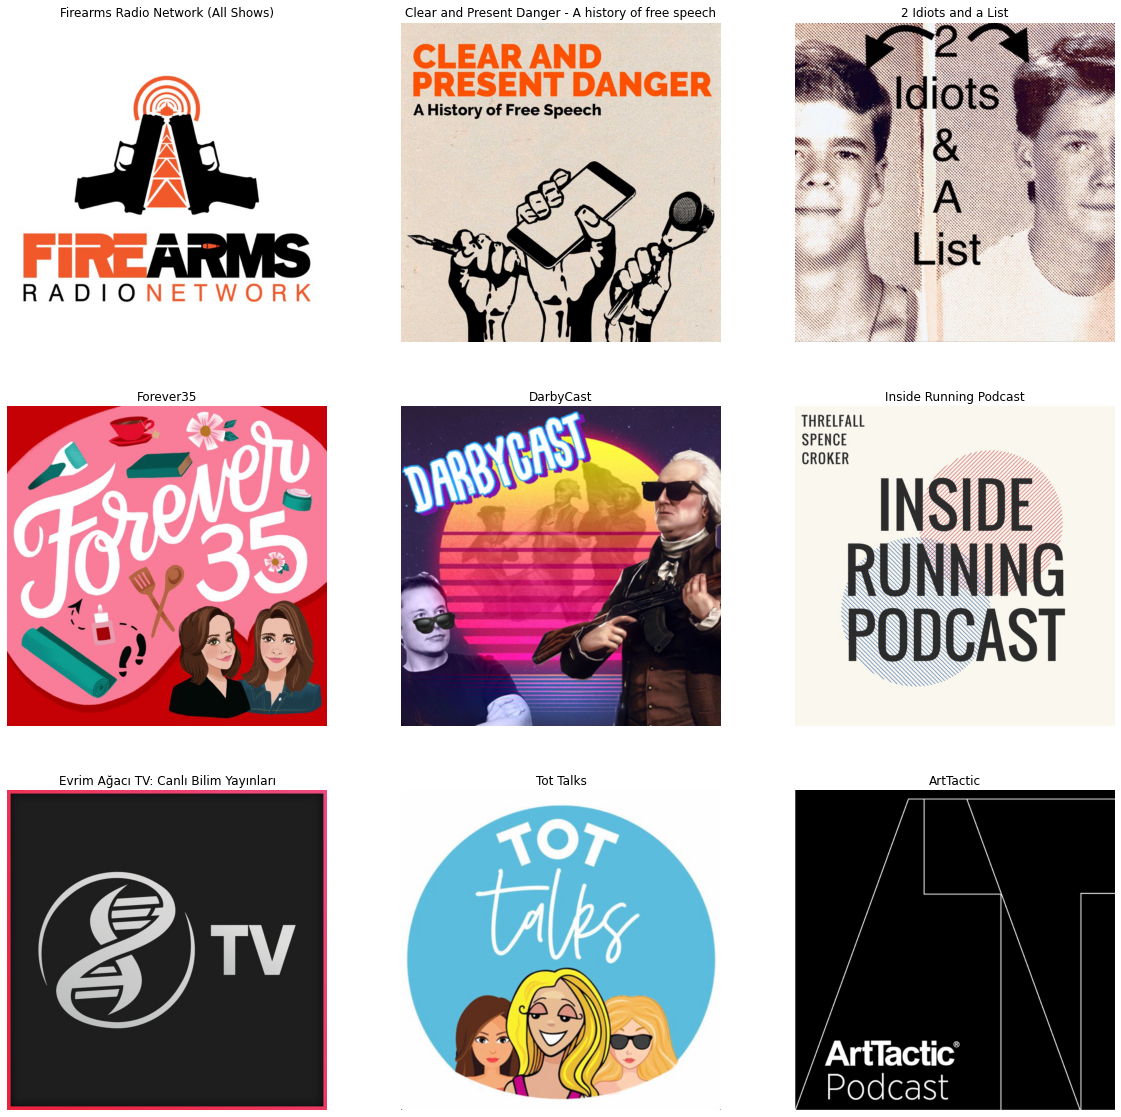

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
#let's take a look a the dataset and the images

images = df['filepaths'].tolist()[:9]
names = df['Name'].tolist()[:9]
plt.figure(figsize=(20, 20))
for index, image in enumerate(images):
      ax = plt.subplot(3, 3, index + 1)
      img = mpimg.imread('/content/images/'+image.split('/')[-1])
      imgplot = plt.imshow(img)
      plt.title(names[index])
      plt.axis("off")


plt.show()

In [5]:
sr_values = df['Primary Genre'].value_counts() #count the number of unique primary genre
sr_values

Technology      651
Government      438
Investing       408
Games           383
Spirituality    381
               ... 
Swimming         94
Volleyball       84
Arts             81
Leisure          73
Fiction          41
Name: Primary Genre, Length: 110, dtype: int64

In [6]:
genres = sr_values.to_dict()
genres = {k: v for k, v in sorted(genres.items(), key=lambda item: item[1], reverse = True)}
print(genres)

{'Technology': 651, 'Government': 438, 'Investing': 408, 'Games': 383, 'Spirituality': 381, 'Careers': 374, 'Christianity': 371, 'Places & Travel': 368, 'Courses': 366, 'Alternative Health': 360, 'Food': 353, 'Wilderness': 347, 'Video Games': 345, 'Judaism': 344, 'Visual Arts': 343, 'Sports': 341, 'Books': 341, 'Self-Improvement': 340, 'Philosophy': 334, 'Entrepreneurship': 332, 'Personal Journals': 332, 'Automotive': 327, 'Hobbies': 326, 'Language Learning': 325, 'Design': 320, 'Islam': 319, 'Performing Arts': 315, 'Sexuality': 314, 'Comedy': 310, 'Society & Culture': 310, 'Buddhism': 305, 'Fashion & Beauty': 304, 'Education': 298, 'Natural Sciences': 296, 'Mental Health': 293, 'History': 292, 'Football': 292, 'Marketing': 289, 'How To': 287, 'Medicine': 287, 'Politics': 282, 'Hinduism': 277, 'Social Sciences': 276, 'Fitness': 273, 'Tech News': 267, 'Parenting': 262, 'True Crime': 262, 'Nutrition': 262, 'Music': 261, 'Management': 259, 'Wrestling': 258, 'Fantasy Sports': 258, 'Busines

Aggregate genres into clusters that make more sense.

In [7]:
genre_aggregation = {'Sports': ['Swimming', 'Volleyball', 'Cricket', 'Rugby', 'Tennis', 'Golf', 'Hockey', 'Soccer', 'Baseball', 'Basketball', 
                                'Fantasy Sports', 'Wrestling', 'Football', 'Running'],
                     'News': ['Tech News', 'Business News', 'News Commentary', 'Sports News', 'Daily News', 'Entertainment News'],
                     'Religion': ['Religion & Spirituality', 'Hinduism', 'Buddhism', 'Islam', 'Judaism', 'Christianity', 'Spirituality'], 
                     'Interviews': ['Comedy Interviews', 'Music Interviews', 'Film Interviews'],
                     'TV & Film': ['Film History', 'TV Reviews', 'Film Reviews'],
                     'Music': ['Music Commentary', 'Music History'],
                     'Arts': ['Visual Arts', 'Performing Arts'],
                     'Science': ['Physics', 'Mathematics', 'Astronomy', 'Earth Sciences', 'Life Sciences', 'Natural Sciences', 'Chemistry'],
                     'Fiction': ['Drama', 'Science Fiction', 'Comedy Fiction'],
                     'Kids & Family': ['Education for Kids', 'Stories for Kids', 'Parenting'],
                     'Nature': ['Wilderness'],
                     'Business': ['Investing', 'Marketing', 'Careers', 'Entrepreneurship', 'Management'],
                     'Politics': ['Government'],
                     'Health': ['Mental Health', 'Health & Fitness', 'Medicine', 'Fitness', 'Nutrition', 'Alternative Health'],
                     'Society & Culture': ['Social Sciences', 'Philosophy', 'History'],
                     'Education': ['Courses', 'Language Learning'],
                     'Hobbies': ['Leisure', 'Crafts', 'How To', 'Home & Garden'],
                     'Vehicles':['Automotive', 'Aviation'],
                     'After Shows': ['Improv'],
                     'Games': ['Video Games'],
                     'Personal': ['Personal Journals', 'Self-Improvement', 'Relationships']}

In [8]:
list_prim_genre = df['Primary Genre'].tolist()
for index, el in enumerate(list_prim_genre):
  for key in genre_aggregation.keys():
    if el in genre_aggregation[key]:
      df.loc[index, 'Primary Genre'] = key
      

In [9]:
sr_values = df['Primary Genre'].value_counts() #count the number of unique primary genre
sr_values
print(len(sr_values))

35


In [ ]:
import plotly.express as px
genres = sr_values.to_dict()
genres = {k: v for k, v in sorted(genres.items(), key=lambda item: item[1], reverse = True)}
fig = px.histogram(df, x='Primary Genre')
fig.show() #plot the distribution of different primary genres

An alternative take on Women's Football. Covering the WSL, NWSL, Euro 2022 and Women's Champions League; Charlotte and Tamsin bring a refreshing voice with debate, banter and highlights from the best of  the Women's Game. Proudly sponsored by FotMob


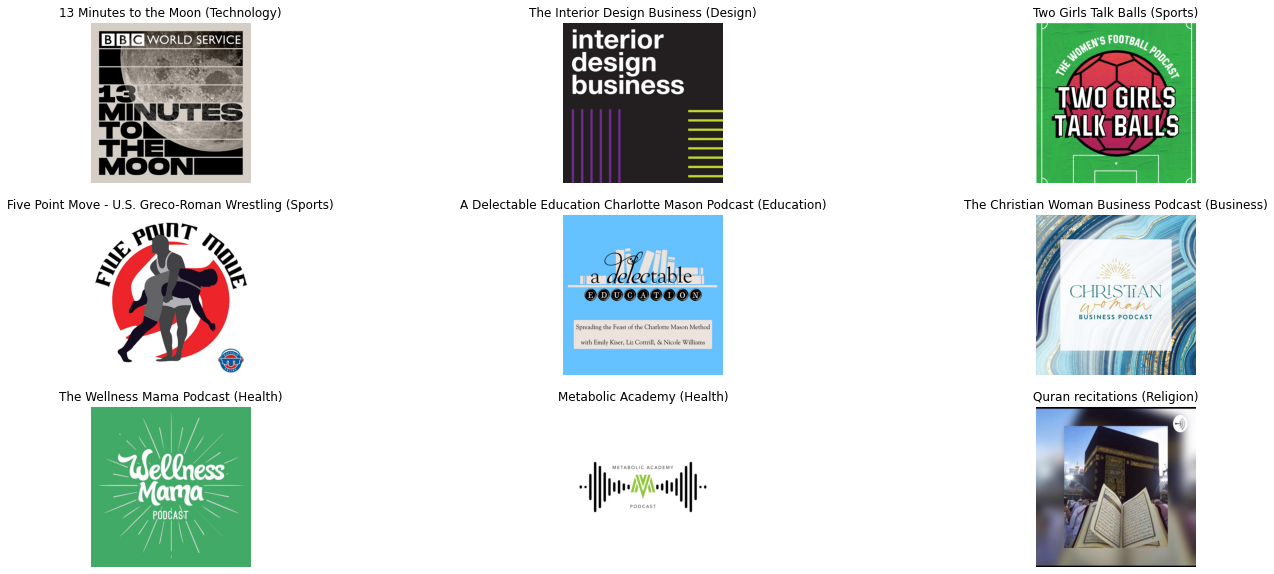

In [ ]:
images = df['filepaths'].tolist()[45:54]
genres = df['Primary Genre'].tolist()[45:54]
description = df['Description'].tolist()[45:54]
names =df['Name'].tolist()[45:54]
plt.figure(figsize=(24, 10))
for index, image in enumerate(images):
      ax = plt.subplot(3, 3, index + 1)
      img = mpimg.imread('/content/images/'+image.split('/')[-1])
      imgplot = plt.imshow(img)
      plt.title(f'{names[index]} ({genres[index]})')
      plt.axis("off")

print(description[2])
plt.show()

In [ ]:
import plotly.express as px
list_description = df['Description'].tolist()
list_description = [len(x) for x in list_description]
fig = px.histogram(list_description)
fig.update_layout(
    title="Description lenght distribution",
    xaxis_title="Value",
    yaxis_title="n of characters",
    showlegend=False)
fig.show() #plot the distribution of the description len (in characters)

In [10]:
df

,Name,Artwork,Genre IDs,Primary Genre,Description,filepaths
0,Firearms Radio Network (All Shows),https://is1-ssl.mzstatic.com/image/thumb/Podca...,"['Wilderness', 'Podcasts', 'Sports', 'Leisure'...",Nature,Master Feed,/content/drive/MyDrive/Colab_Notebooks/podcast...
1,Clear and Present Danger - A history of free s...,https://is4-ssl.mzstatic.com/image/thumb/Podca...,"['History', 'Podcasts', 'Society & Culture']",Society & Culture,"Why have kings, emperors, and governments kill...",/content/drive/MyDrive/Colab_Notebooks/podcast...
2,2 Idiots and a List,https://is4-ssl.mzstatic.com/image/thumb/Podca...,"['Music Commentary', 'Podcasts', 'Music']",Music,"Welcome to “2 Idiots and a List”, the podcast ...",/content/drive/MyDrive/Colab_Notebooks/podcast...
3,Forever35,https://is5-ssl.mzstatic.com/image/thumb/Podca...,"['Fashion & Beauty', 'Podcasts', 'Arts', 'Heal...",Fashion & Beauty,Which night creams will make you look well-res...,/content/drive/MyDrive/Colab_Notebooks/podcast...
4,DarbyCast,https://is2-ssl.mzstatic.com/image/thumb/Podca...,"['Comedy Fiction', 'Podcasts', 'Fiction']",Fiction,"Neither the Darbyshire book series, nor this p...",/content/drive/MyDrive/Colab_Notebooks/podcast...
...,...,...,...,...,...,...
29274,Within the Trenches,https://is5-ssl.mzstatic.com/image/thumb/Podca...,"['1304', '26']",Education,The JCast on Jabber Log features two main show...,/content/drive/MyDrive/Colab_Notebooks/podcast...
29275,"MTG Pro Tutor - Insights, Tips & Advice from M...",https://is1-ssl.mzstatic.com/image/thumb/Podca...,"['1461', '26', '1323', '1460']",Games,MTG Pro Tutor is a top rated Magic: The Gather...,/content/drive/MyDrive/Colab_Notebooks/podcast...
29276,National CASA Podcast,https://is4-ssl.mzstatic.com/image/thumb/Featu...,"['1475', '26', '1325', '1304', '1468']",Politics,"Today, more than 1,000 CASA program offices op...",/content/drive/MyDrive/Colab_Notebooks/podcast...
29277,Tottenham Hotspur Family,https://is4-ssl.mzstatic.com/image/thumb/Podca...,"['1467', '26', '1316']",Sports,The Tottenham Hotspur Family Podcast\n\n\nA gl...,/content/drive/MyDrive/Colab_Notebooks/podcast...


In [11]:
df.to_csv('/content/drive/MyDrive/Colab_Notebooks/podcast/appledataset/podcast_final.csv', index = False)

In [ ]:
from tensorflow import keras
from keras.preprocessing.image import load_img

#check that all the images are of the same size
size = (600, 600)
format = 'JPEG'
mode = 'RGB'
for el in df['filepaths'].tolist():
  img = load_img('/content/images/'+image.split('/')[-1])
  print(el)
  print(img.format)
  print(img.mode)
  print(img.size)
  break

/content/drive/MyDrive/Colab_Notebooks/podcast/appledataset/images/id608035917.jpg
JPEG
RGB
(600, 600)
